# Introduction to Geopandas 

In [1]:
### Installations
# conda create --name=gis python=3.7 fiona geopandas jupyterlab jupyter_conda --channel=conda-forge
# jupyter labextension install jupyterlab_toastify jupyterlab_conda

# conda install -c conda-forge missingno descartes

# which jupyter
# jupyter-notebook

Data Source: 
https://github.com/Automating-GIS-processes/Lesson-2-Geo-DataFrames/raw/master/data/Data.zip

In [2]:
# Import necessary modules
import geopandas as gpd

## Reading a shapefile

In [3]:
# Set filepath (fix path relative to yours)
fp = "./fish-data/DAMSELFISH_distributions.shp"

# Read file using gpd.read_file()
data = gpd.read_file(fp)

In [4]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [5]:
#Preview GeoDataFrame
data.head()

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-115.64375 29.71392, -115.61585 29.6..."
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-105.58995 21.89340, -105.56483 21.8..."
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-111.15962 19.01536, -111.15948 18.9..."
3,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-80.86500 -0.77894, -80.75930 -0.833..."
4,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-67.33922 -55.67610, -67.33755 -55.6..."


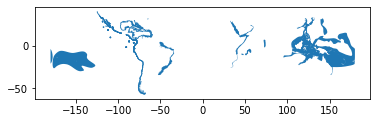

In [6]:
# creates a simple map out of the data (uses matplotlib as a backend)
data.plot()

In [7]:
# Create a output path for the data
out = r"./fish-data/DAMSELFISH_distributions_SELECTION.shp"

# Select first 50 rows
selection = data[0:50]

# Write those rows into a new Shapefile (the default output file format is Shapefile)
selection.to_file(out)

In [8]:
# It is possible to use only specific columns by specifying the column name within square brackets []
data['geometry'].head()

0    POLYGON ((-115.64375 29.71392, -115.61585 29.6...
1    POLYGON ((-105.58995 21.89340, -105.56483 21.8...
2    POLYGON ((-111.15962 19.01536, -111.15948 18.9...
3    POLYGON ((-80.86500 -0.77894, -80.75930 -0.833...
4    POLYGON ((-67.33922 -55.67610, -67.33755 -55.6...
Name: geometry, dtype: geometry

In [9]:
# Make a selection that contains only the first five rows
selection = data[0:5]

In [10]:
for index, row in selection.iterrows():
    poly_area = row['geometry'].area
    print("Polygon area at index {0} is: {1:.3f}".format(index, poly_area))

Polygon area at index 0 is: 19.396
Polygon area at index 1 is: 6.146
Polygon area at index 2 is: 2.697
Polygon area at index 3 is: 87.461
Polygon area at index 4 is: 0.001


In [11]:
#all the functionalities of Pandas are available directly in Geopandas without the need to call pandas separately 
#because Geopandas is an extension for Pandas
data['area'] = data.area

In [12]:
# Maximum area
max_area = data['area'].max()

# Mean area
mean_area = data['area'].mean()

display(type(max_area))
display(type(mean_area))

numpy.float64

numpy.float64

In [13]:
print("Max area: %s\nMean area: %s" % (round(max_area, 2), round(mean_area, 2)))

Max area: 1493.2
Mean area: 19.96


## Creating geometries into a GeoDataFrame

In [14]:
# Import necessary modules first
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona

In [15]:
# Create an empty geopandas GeoDataFrame
newdata = gpd.GeoDataFrame()

In [16]:
newdata.info

<bound method DataFrame.info of Empty GeoDataFrame
Columns: []
Index: []>

In [17]:
newdata.describe

<bound method NDFrame.describe of Empty GeoDataFrame
Columns: []
Index: []>

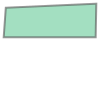

In [18]:
# Coordinates of the Helsinki Senate square in Decimal Degrees
coordinates = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]

# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

# Let's see what we have
poly

In [19]:
# Insert the polygon into 'geometry' -column at index 0
newdata.loc[0, 'geometry'] = poly

# Let's see what we have now
display(newdata.info)
display(newdata.head())

<bound method DataFrame.info of                                             geometry
0  POLYGON ((24.950899 60.169158, 24.953492 60.16...>

,geometry
0,"POLYGON ((24.95090 60.16916, 24.95349 60.16916..."


In [20]:
# Add a new column and insert data
newdata.loc[0, 'Location'] = 'Senaatintori'

# Let's check the data
newdata.head()

,geometry,Location
0,"POLYGON ((24.95090 60.16916, 24.95349 60.16916...",Senaatintori


In [21]:
# Show the coordinate system of the data to be created
print(newdata.crs)

None


In [22]:
# Import specific function 'from_epsg' from fiona module
from fiona.crs import from_epsg

# Set the GeoDataFrame's coordinate system to WGS84
newdata.crs = from_epsg(4326)

# Let's see how the crs definition looks like
newdata.crs

{'init': 'epsg:4326', 'no_defs': True}

In [23]:
newdata.info

<bound method DataFrame.info of                                             geometry      Location
0  POLYGON ((24.950899 60.169158, 24.953492 60.16...  Senaatintori>

In [24]:
# Determine the output path for the Shapefile
outfp = r"./fish-data/Senaatintori.shp"

# Write the data into that Shapefile
newdata.to_file(outfp)

In [25]:
# Group the data by column 'BINOMIAL'
grouped = data.groupby('BINOMIAL')

# Let's see what we got
grouped

In [26]:
# Iterate over the group object
for key, values in grouped:
    individual_fish = values

In [27]:
individual_fish

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry,area
27,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((121.63003 33.04249, 121.63219 33.042...",38.671198
28,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((32.56219 29.97489, 32.56497 29.96967...",37.445735
29,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((130.90521 34.02498, 130.90710 34.022...",16.939460
30,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((56.32233 -3.70727, 56.32294 -3.70872...",10.126967
31,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((40.64476 -10.85502, 40.64600 -10.855...",7.760303
32,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((48.11258 -9.33510, 48.11406 -9.33614...",3.434236
33,154915.0,Teixeirichthys jordani,1,None,2012,"Red List Index (Sampled Approach), Zoological ...",None,None,None,None,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((51.75404 -9.21679, 51.75532 -9.21879...",2.408620


In [28]:
type(individual_fish)

geopandas.geodataframe.GeoDataFrame

In [29]:
print(key)

Teixeirichthys jordani


In [30]:
import os

In [31]:
# Determine outputpath
outFolder = r"./fish-data/"

# Create a new folder called 'Results' (if does not exist) to that folder using os.makedirs() function
resultFolder = os.path.join(outFolder, 'Results')
if not os.path.exists(resultFolder):
    os.makedirs(resultFolder)

# Iterate over the
for key, values in grouped:
    # Format the filename (replace spaces with underscores)
    outName = "%s.shp" % key.replace(" ", "_")

    # Print some information for the user
    print("Processing: %s" % key)

    # Create an output path
    outpath = os.path.join(resultFolder, outName)

    # Export the data
    values.to_file(outpath)

Processing: Abudefduf concolor
Processing: Abudefduf declivifrons
Processing: Abudefduf troschelii
Processing: Amphiprion sandaracinos
Processing: Azurina eupalama
Processing: Azurina hirundo
Processing: Chromis alpha
Processing: Chromis alta
Processing: Chromis atrilobata
Processing: Chromis crusma
Processing: Chromis cyanea
Processing: Chromis flavicauda
Processing: Chromis intercrusma
Processing: Chromis limbaughi
Processing: Chromis pembae
Processing: Chromis punctipinnis
Processing: Chrysiptera flavipinnis
Processing: Hypsypops rubicundus
Processing: Microspathodon bairdii
Processing: Microspathodon dorsalis
Processing: Nexilosus latifrons
Processing: Stegastes acapulcoensis
Processing: Stegastes arcifrons
Processing: Stegastes baldwini
Processing: Stegastes beebei
Processing: Stegastes flavilatus
Processing: Stegastes leucorus
Processing: Stegastes rectifraenum
Processing: Stegastes redemptus
Processing: Teixeirichthys jordani
